In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
train_data = X_train.drop(columns=['ocean_proximity']).join(y_train)
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923723,-0.107712,0.044820,0.068225,0.097699,0.055277,-0.012791,-0.042860
latitude,-0.923723,1.000000,0.010157,-0.036727,-0.065855,-0.107705,-0.070981,-0.084533,-0.149001
housing_median_age,-0.107712,0.010157,1.000000,-0.359815,-0.320894,-0.294045,-0.302356,-0.118383,0.107117
total_rooms,0.044820,-0.036727,-0.359815,1.000000,0.931341,0.855042,0.918374,0.196811,0.129577
total_bedrooms,0.068225,-0.065855,-0.320894,0.931341,1.000000,0.875747,0.978451,-0.008110,0.045219
population,0.097699,-0.107705,-0.294045,0.855042,0.875747,1.000000,0.906667,0.003063,-0.029969
households,0.055277,-0.070981,-0.302356,0.918374,0.978451,0.906667,1.000000,0.012352,0.059706
median_income,-0.012791,-0.084533,-0.118383,0.196811,-0.008110,0.003063,0.012352,1.000000,0.693830
median_house_value,-0.042860,-0.149001,0.107117,0.129577,0.045219,-0.029969,0.059706,0.693830,1.000000


<Axes: >

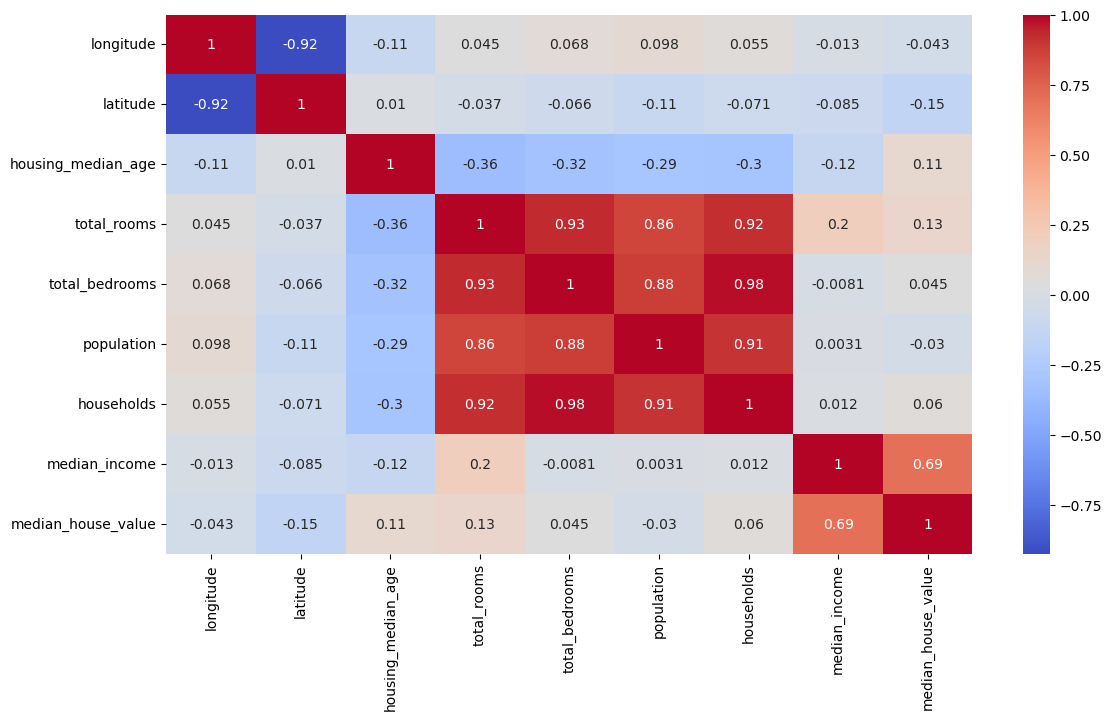

In [7]:
plt.figure(figsize=(13,7))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

In [8]:
train_data = X_train.join(y_train)
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(columns=['ocean_proximity'])
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.923723,-0.107712,0.044820,0.068225,0.097699,0.055277,-0.012791,-0.042860,0.324053,-0.056396,0.010685,-0.471112,0.036907
latitude,-0.923723,1.000000,0.010157,-0.036727,-0.065855,-0.107705,-0.070981,-0.084533,-0.149001,-0.451266,0.353474,-0.018729,0.354962,-0.154199
housing_median_age,-0.107712,0.010157,1.000000,-0.359815,-0.320894,-0.294045,-0.302356,-0.118383,0.107117,0.040891,-0.234944,0.019157,0.255932,0.027452
total_rooms,0.044820,-0.036727,-0.359815,1.000000,0.931341,0.855042,0.918374,0.196811,0.129577,-0.001849,0.027229,-0.008461,-0.025779,-0.010788
total_bedrooms,0.068225,-0.065855,-0.320894,0.931341,1.000000,0.875747,0.978451,-0.008110,0.045219,0.021040,-0.005125,-0.004846,-0.022716,-0.002630
population,0.097699,-0.107705,-0.294045,0.855042,0.875747,1.000000,0.906667,0.003063,-0.029969,0.074811,-0.020479,-0.011559,-0.061836,-0.024206
households,0.055277,-0.070981,-0.302356,0.918374,0.978451,0.906667,1.000000,0.012352,0.059706,0.045167,-0.037633,-0.010160,-0.013443,-0.001442
median_income,-0.012791,-0.084533,-0.118383,0.196811,-0.008110,0.003063,0.012352,1.000000,0.693830,0.167781,-0.241881,-0.010423,0.058540,0.034564
median_house_value,-0.042860,-0.149001,0.107117,0.129577,0.045219,-0.029969,0.059706,0.693830,1.000000,0.257442,-0.487967,0.026347,0.159638,0.148963
<1H OCEAN,0.324053,-0.451266,0.040891,-0.001849,0.021040,0.074811,0.045167,0.167781,0.257442,1.000000,-0.611442,-0.015549,-0.311622,-0.340076


<Axes: >

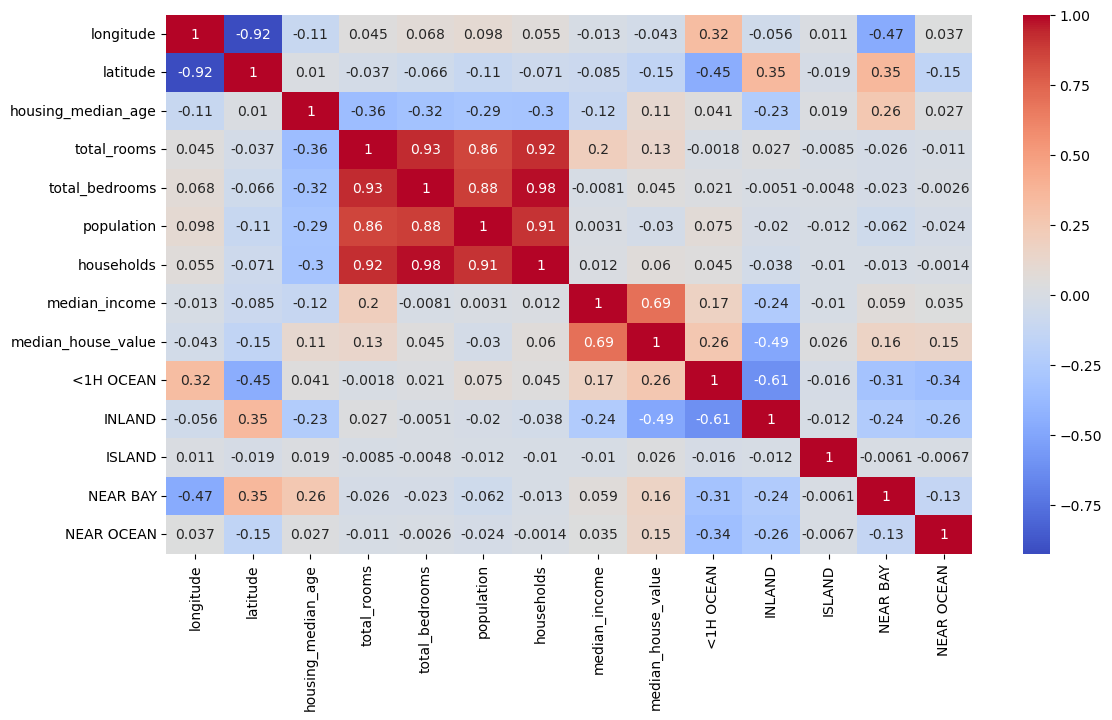

In [9]:
plt.figure(figsize=(13,7))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

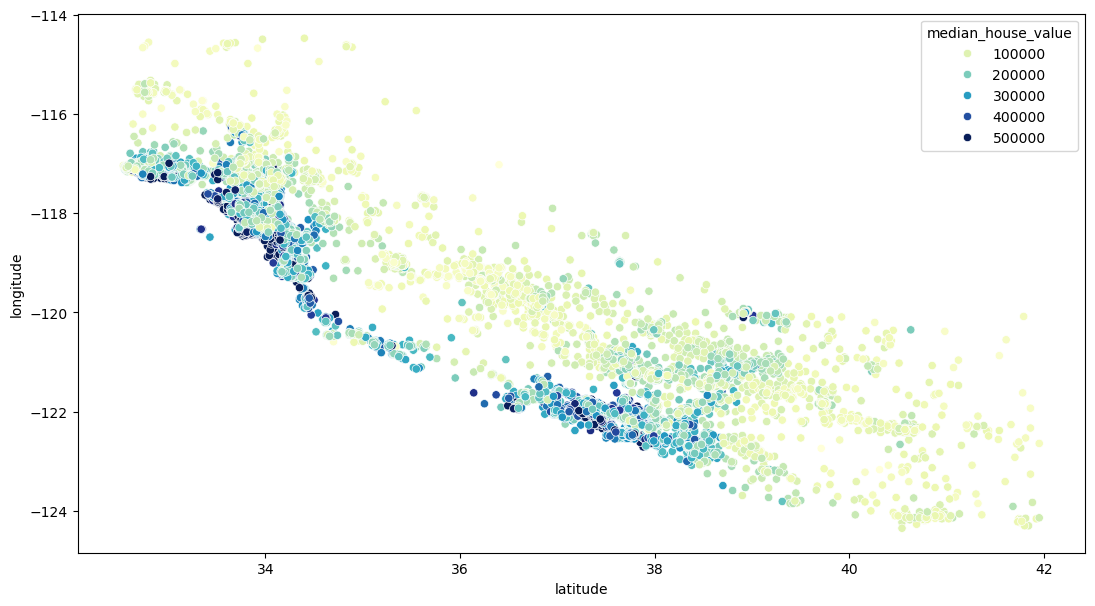

In [10]:
plt.figure(figsize=(13,7))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="YlGnBu")

In [11]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['rooms_per_household'] = train_data['total_rooms']/train_data['households']
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,rooms_per_household
15329,-117.30,33.23,13.0,3619.0,791.0,1759.0,806.0,2.7650,98500.0,1,0,0,0,0,0.218569,4.490074
4428,-118.22,34.09,40.0,1081.0,282.0,970.0,263.0,1.8750,150000.0,1,0,0,0,0,0.260870,4.110266
13039,-121.15,38.68,6.0,9798.0,1551.0,4583.0,1494.0,5.0159,189600.0,0,1,0,0,0,0.158298,6.558233
12886,-121.34,38.66,17.0,1149.0,257.0,583.0,243.0,2.8092,137500.0,0,1,0,0,0,0.223673,4.728395
223,-122.20,37.80,52.0,1547.0,293.0,706.0,268.0,4.7721,217100.0,0,0,0,1,0,0.189399,5.772388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-118.09,33.96,20.0,1911.0,472.0,1407.0,465.0,2.7647,163000.0,1,0,0,0,0,0.246991,4.109677
17895,-121.95,37.36,27.0,3236.0,832.0,2230.0,798.0,3.5625,208600.0,1,0,0,0,0,0.257108,4.055138
11157,-117.98,33.83,17.0,3506.0,992.0,2104.0,893.0,3.3006,185800.0,1,0,0,0,0,0.282944,3.926092
13154,-121.50,36.81,20.0,1345.0,230.0,731.0,217.0,4.2333,363300.0,0,1,0,0,0,0.171004,6.198157


<Axes: >

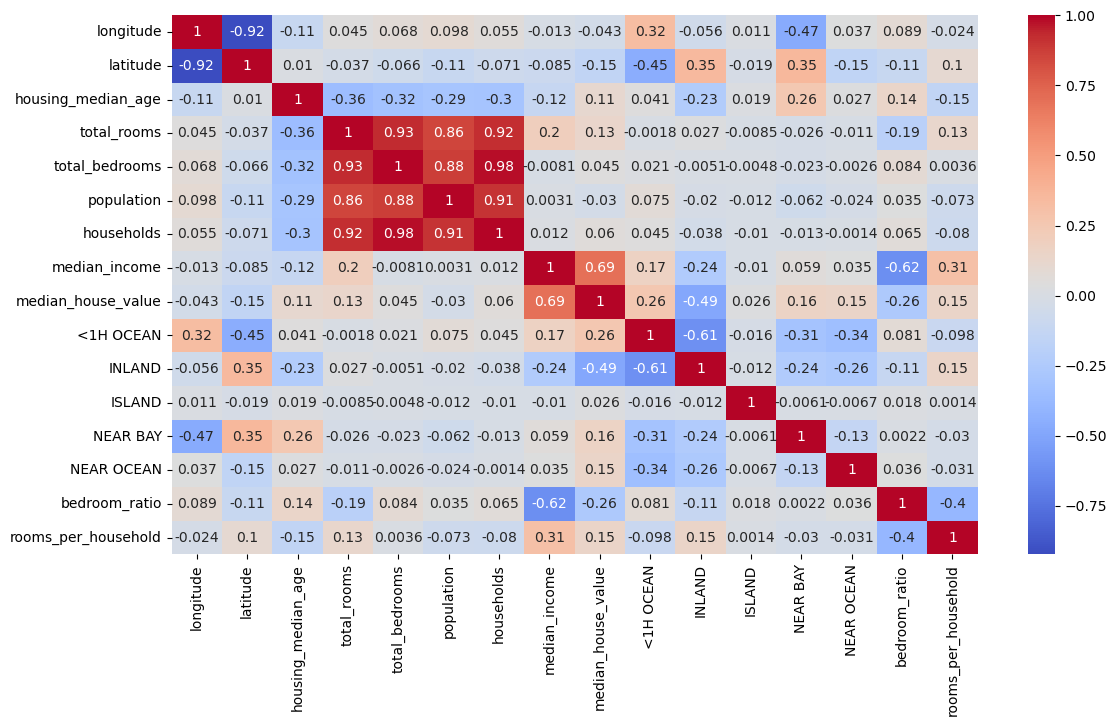

In [12]:
plt.figure(figsize=(13,7))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

In [13]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
test_data = X_test.join(y_test)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(columns=['ocean_proximity'])

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['rooms_per_household'] = test_data['total_rooms']/test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [15]:
X_test.insert(10, 'ISLAND', 0)

In [32]:
model.score(X_test, y_test)

0.6256048260499303

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
forest.score(X_test, y_test)

0.8144479198769408

In [46]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [125, 150, 175],
    "min_samples_split": [4, 6],
    "max_depth": [None, 2]
}

grid_search =GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2], 'min_samples_split': [4, 6],
                         'n_estimators': [125, 150, 175]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=175)

In [48]:
grid_search.best_estimator_.score(X_test, y_test)

0.8142045775829648